In [14]:
import os
import glob
import numpy as np
import sqlite3
import cv2
 
PATH = '/Users/xiaofeiwu/Pictures/_new/'
#--- Extract files from folder following pattern
types = ('*.jpg', '*.png') 
files=[]
for fs in types:
    files.extend(glob.glob(PATH+fs))
n_files = len(files)
print('Number of files in folder: ', n_files)

Number of files in folder:  4


In [17]:
#--- Simple database creator
def create_db(filename):
    db = sqlite3.connect(filename)
    cursor = db.cursor()
    cursor.execute("DROP TABLE IF EXISTS Images")
    cursor.execute("CREATE TABLE Images(ObjId INT, img BLOB, size INT)")
    db.commit()
    db.close()
 
filename_db = 'DR7_IMAGES.db'
create_db(filename_db)

In [18]:
#--- Open database and loop over files to insert in database
con = sqlite3.connect(filename_db)
cur = con.cursor()
for i, file_i in enumerate(files):
 
    #--- Read image as a binary blob
    with open(file_i, 'rb') as f:
        image_bytes = f.read()
    f.close()
 
    #--- Decode raw bytes to get image size
    nparr  = np.frombuffer(image_bytes, np.uint8)
    img_np = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    image_size = img_np.shape[1]
 
    #--- Extract file name without extension
    filename = os.path.relpath(file_i, PATH)
    objid = int(os.path.splitext(filename)[0].split('_')[0])
 
    #--- Insert image and data into table
    cur.execute("insert into Images VALUES(?,?,?)", (objid,sqlite3.Binary(image_bytes),image_size)   )
    con.commit()
 
    #--- Cheap progress
    if ((i % 100) == 0):
        print(i, n_files)
 
cur.close()
con.close()

0 4


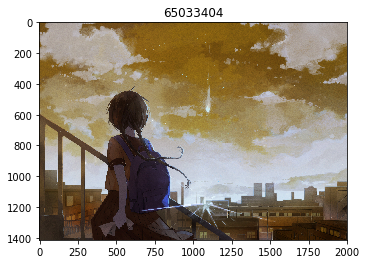

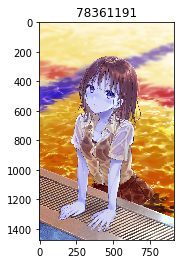

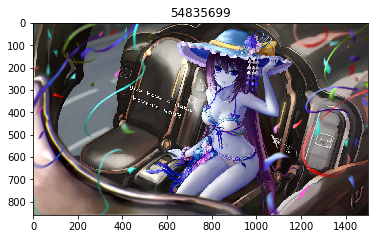

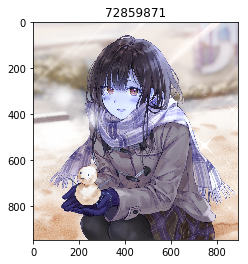

In [19]:
from matplotlib import pyplot as plt
import cv2

con = sqlite3.connect(filename_db)
cur = con.cursor()
row = cur.execute("SELECT ObjId, img from Images")
for ObjId, item in row:
 
    #--- Decode blob
    # nparr  = np.fromstring(item, np.uint8)
    nparr  = np.frombuffer(item, np.uint8)
    img_np = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    # gray = cv2.cvtColor(img_np, cv2.COLOR_BGR2GRAY)
 
    #--- Display image
    # cv2.imshow('image',img_np)
    plt.imshow(img_np)
    # plt.imshow(gray)
    plt.title(str(ObjId))
    plt.show()
 
cur.close()
con.close()

In [20]:
conn = sqlite3.connect(filename_db)
c = conn.cursor()
			
#get the count of tables with the name
c.execute(''' SELECT count(name) FROM sqlite_master WHERE type='table' AND name='Images' ''')

#if the count is 1, then table exists
if c.fetchone()[0]==1 : 
	print('Table exists.')
else :
	print('Table does not exist.')
			
#commit the changes to db			
conn.commit()
#close the connection
conn.close()

Table exists.
